# 올리베티 얼굴 데이터셋 분류하기
64 x 64크기의 흑백 얼굴 이미지 400개 가량의 데이터셋. 각 샘플은 4,096크기의 1D 벡터로 펼쳐져 있음.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
x, y = olivetti["data"], olivetti["target"]

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(x, y):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test = x[test_index]
    y_test = y[test_index]

데이터셋이 400개 가량으로 매우 적어서 랜덤하게 학습, 테스트를 나누면 편향될 수 있음.  
따라서 **계층적 샘플링** 을 통해 학습, 테스트를 나눔.

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(log_reg.predict(x_test), y_test)

0.975

일단 기준으로 삼을 로지스틱 회귀의 성능이 97.5%로 준수한 편

In [5]:
from sklearn.cluster import KMeans

k = 40
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

KMeans(n_clusters=40)

In [6]:
y_pred_kmeans = kmeans.predict(x_test)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_img(img_vecs, r=10):
    if len(img_vecs) >= r:
        it = r
    else:
        it = len(img_vecs)
    
    if it == 0:
        return
    else:
        fir_img_vec = img_vecs[0]
        fir_img = fir_img_vec.reshape(64, 64)

        for i in range(1, it):
            temp_img_vec = img_vecs[i]
            temp_img = temp_img_vec.reshape(64, 64)
            fir_img = np.hstack([fir_img, temp_img])
        print(fir_img.shape)
        
        plt.imshow(fir_img, cmap="gray")
        plt.show()
        

(64, 64)


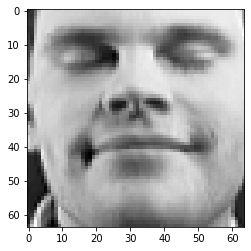

(64, 320)


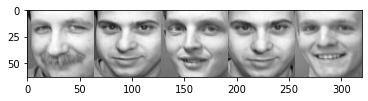

(64, 448)


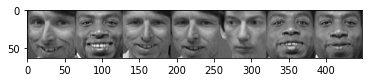

(64, 448)


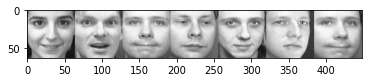

(64, 640)


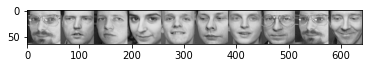

(64, 192)


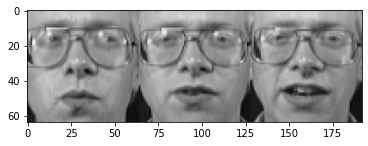

(64, 320)


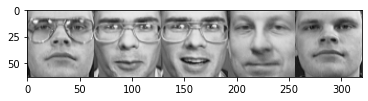

(64, 192)


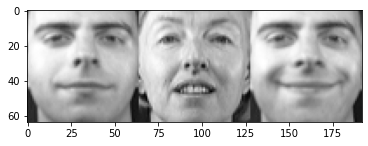

(64, 256)


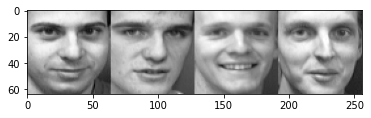

(64, 128)


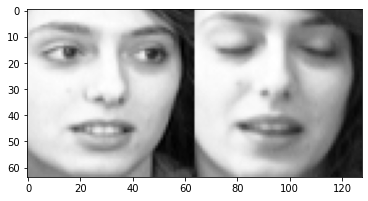

(64, 192)


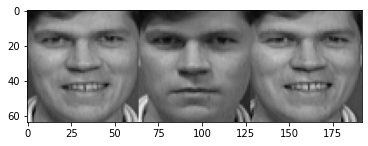

(64, 192)


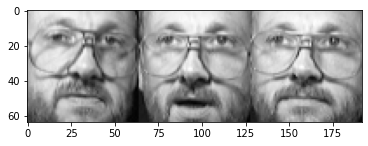

(64, 192)


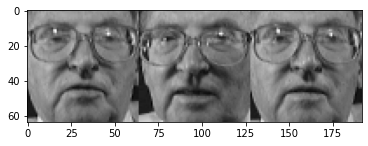

(64, 192)


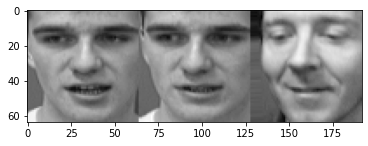

(64, 192)


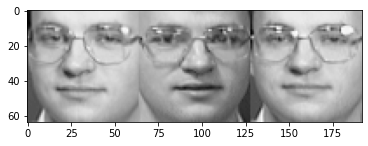

(64, 128)


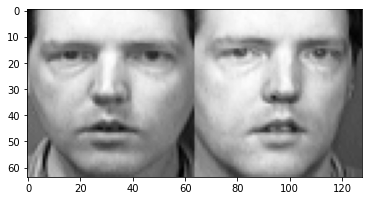

(64, 384)


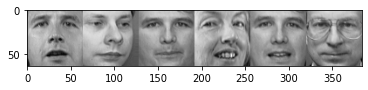

(64, 64)


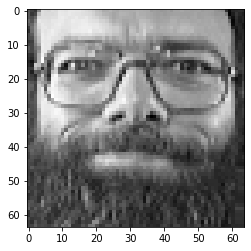

(64, 192)


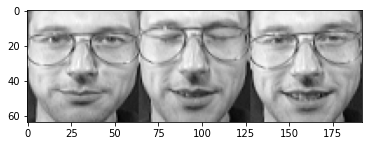

(64, 128)


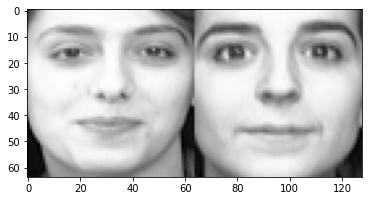

(64, 192)


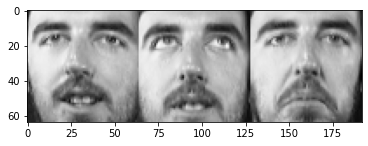

(64, 64)


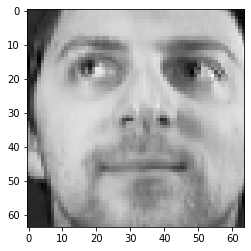

(64, 128)


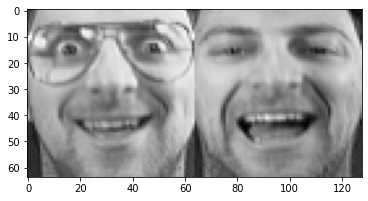

(64, 64)


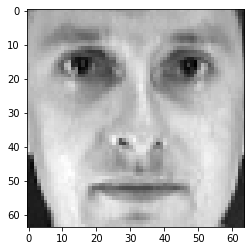

(64, 64)


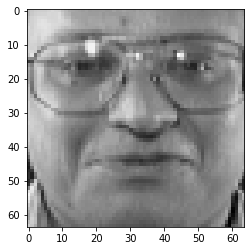

(64, 64)


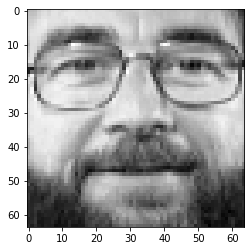

(64, 128)


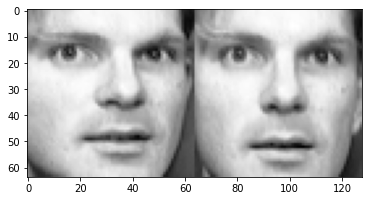

(64, 448)


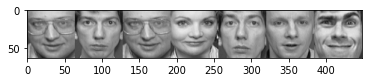

(64, 128)


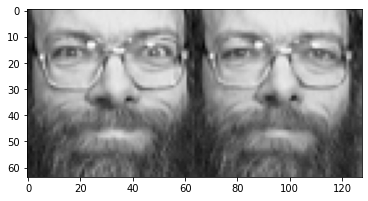

(64, 128)


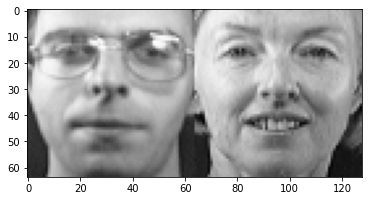

(64, 256)


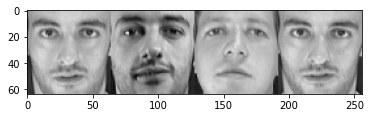

(64, 128)


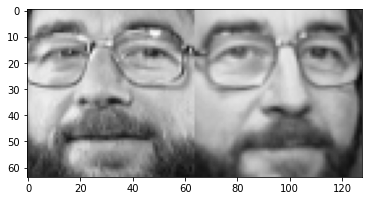

(64, 576)


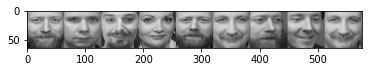

(64, 256)


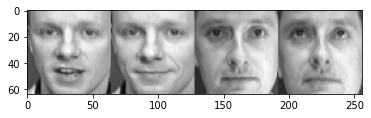

(64, 128)


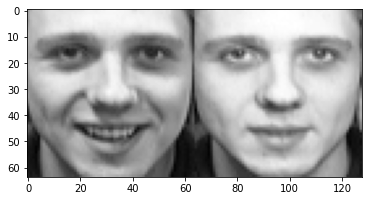

(64, 64)


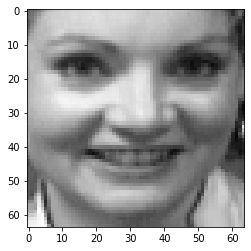

In [8]:
for c in range(k):
    target_id = (y_pred_kmeans == c)
    target_img_vecs = x_test[target_id]
    plot_img(target_img_vecs)

kmeans알고리즘이 군집한 클러스터에 따라 테스트 데이터를 예측해서 이미지를 출력한 모습.  
정확한 정답은 아니어도 구도, 얼굴 생김새에 따라 뭔가 분류가 된 느낌이 들긴 함.

(64, 64)


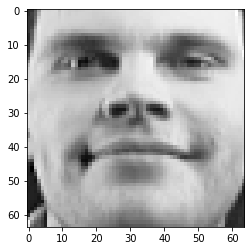

(64, 640)


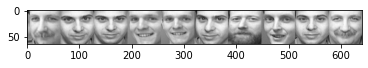

(64, 640)


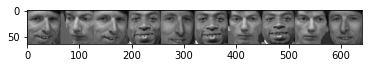

(64, 640)


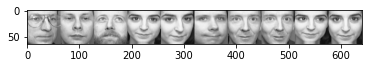

(64, 640)


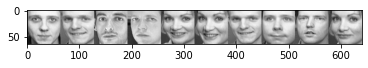

(64, 448)


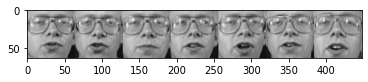

(64, 640)


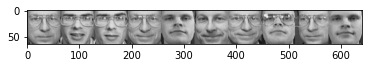

(64, 512)


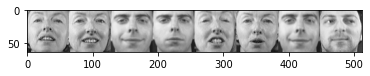

(64, 256)


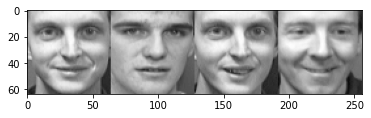

(64, 256)


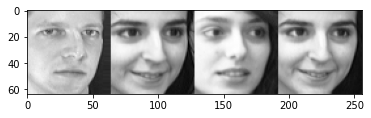

(64, 384)


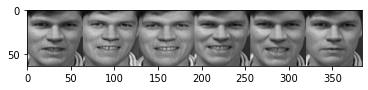

(64, 448)


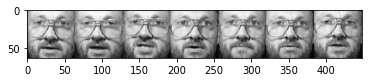

(64, 448)


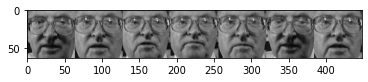

(64, 576)


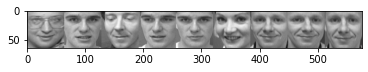

(64, 192)


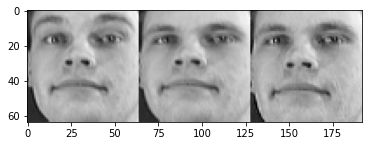

(64, 448)


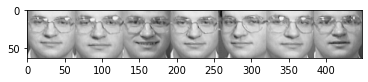

(64, 320)


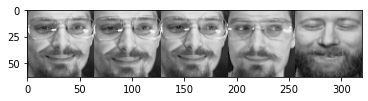

(64, 576)


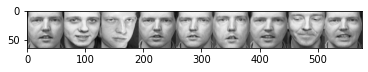

(64, 640)


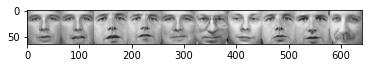

(64, 256)


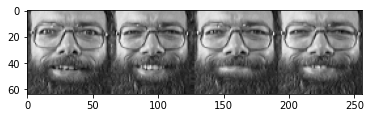

(64, 512)


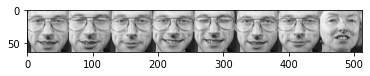

(64, 320)


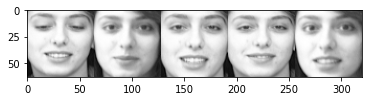

(64, 448)


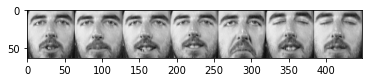

(64, 128)


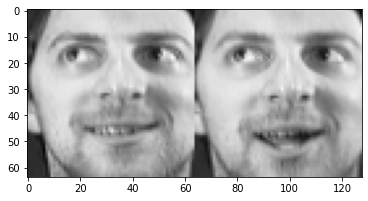

(64, 256)


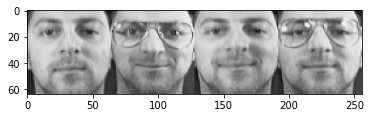

(64, 256)


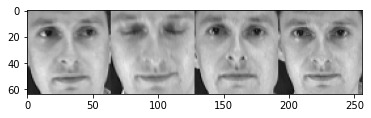

(64, 256)


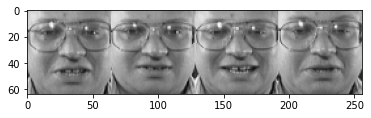

(64, 192)


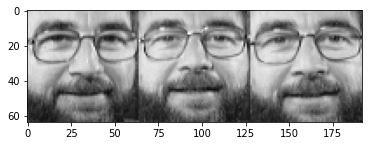

(64, 640)


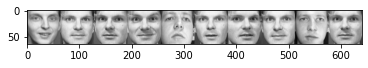

(64, 640)


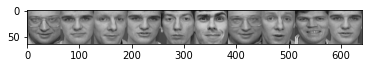

(64, 192)


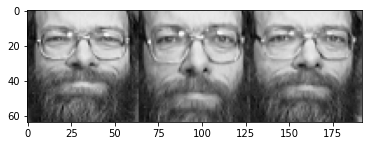

(64, 384)


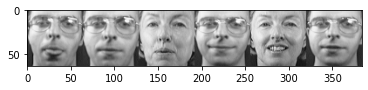

(64, 512)


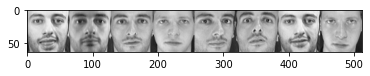

(64, 256)


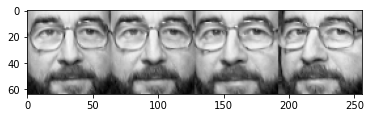

(64, 320)


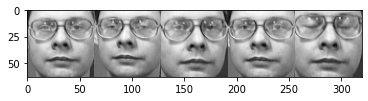

(64, 640)


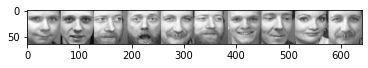

(64, 320)


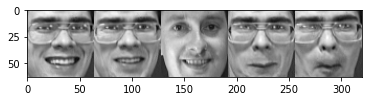

(64, 320)


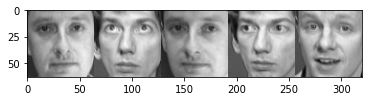

(64, 256)


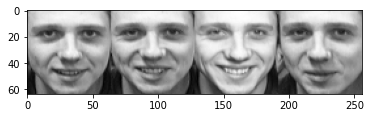

(64, 128)


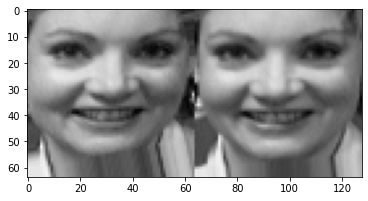

In [9]:
for c in range(k):
    target_id = (kmeans.labels_ == c)
    target_img_vecs = x_train[target_id]
    plot_img(target_img_vecs)

이건 클러스터 계산에 사용된 학습 데이터셋에 대해서 출력한 것

(64, 448)


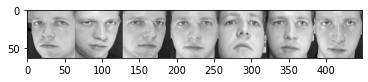

(64, 448)


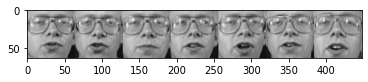

(64, 448)


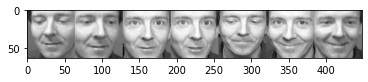

(64, 448)


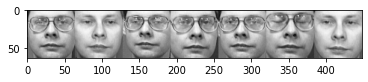

(64, 448)


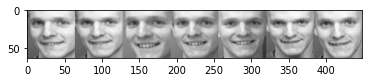

(64, 448)


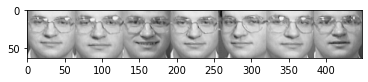

(64, 448)


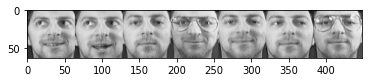

(64, 448)


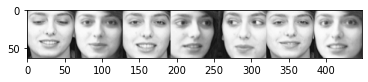

(64, 448)


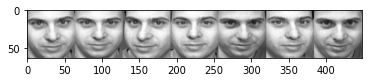

(64, 448)


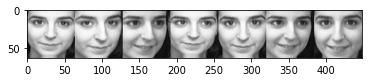

(64, 448)


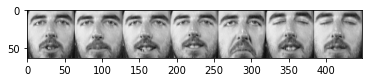

(64, 448)


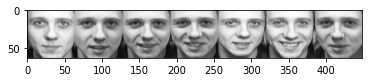

(64, 448)


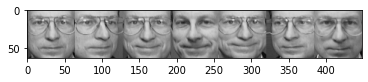

(64, 448)


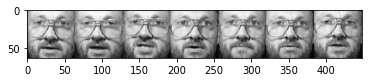

(64, 448)


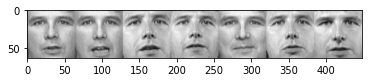

(64, 448)


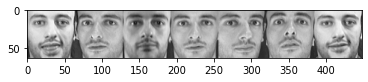

(64, 448)


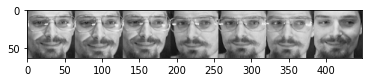

(64, 448)


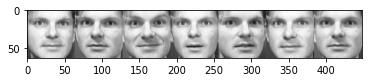

(64, 448)


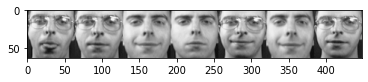

(64, 448)


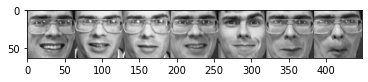

(64, 448)


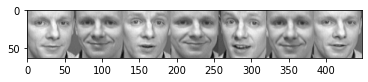

(64, 448)


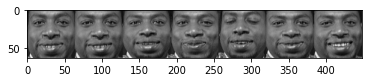

(64, 448)


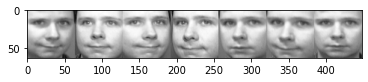

(64, 448)


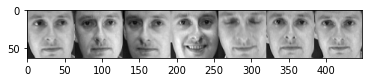

(64, 448)


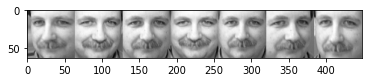

(64, 448)


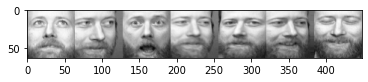

(64, 448)


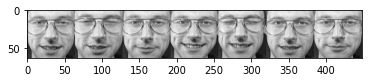

(64, 448)


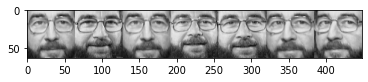

(64, 448)


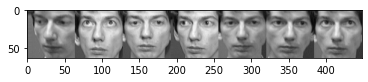

(64, 448)


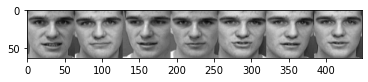

(64, 448)


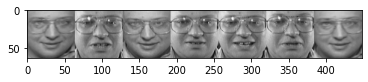

(64, 448)


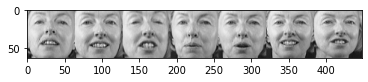

(64, 448)


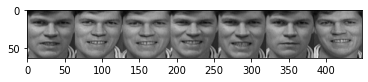

(64, 448)


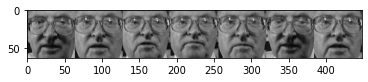

(64, 448)


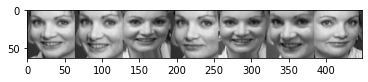

(64, 448)


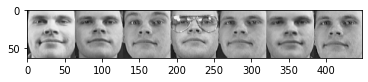

(64, 448)


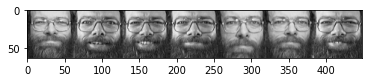

(64, 448)


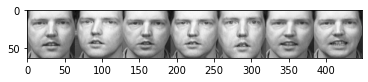

(64, 448)


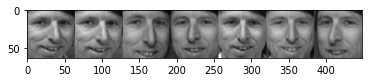

(64, 448)


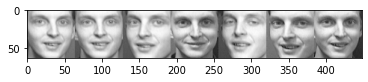

In [10]:
for c in range(k):
    target_id = (y_train == c)
    target_img_vecs = x_train[target_id]
    plot_img(target_img_vecs)

이건 클러스터를 떠나 정답값에 대해서 이미지를 출력한 것.  
확실히 클러스터링에는 얼굴 구도, 안경같이 특징적인 것으로 묶은 것 같음.

(64, 192)


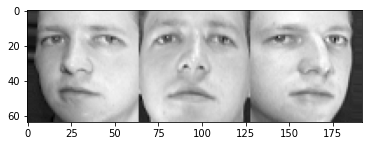

(64, 192)


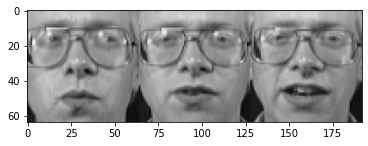

(64, 192)


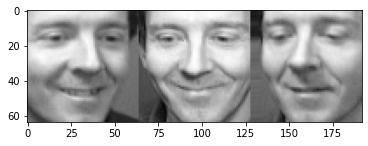

(64, 192)


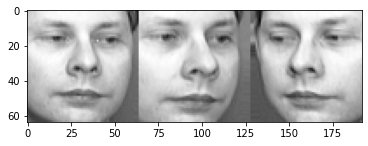

(64, 128)


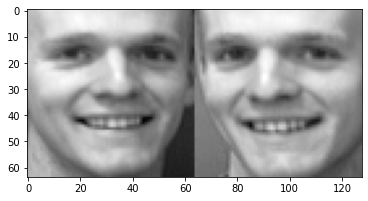

(64, 256)


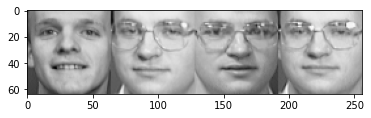

(64, 192)


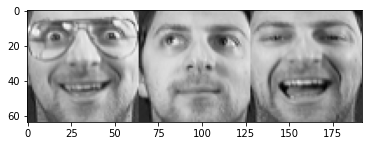

(64, 256)


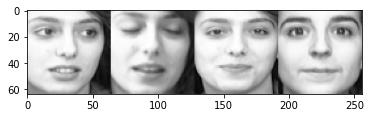

(64, 192)


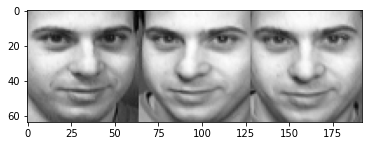

(64, 64)


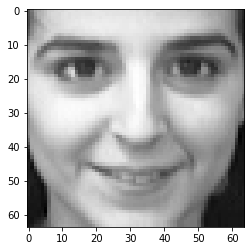

(64, 192)


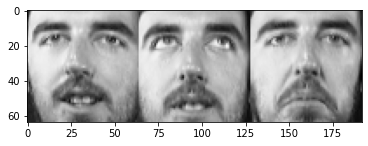

(64, 192)


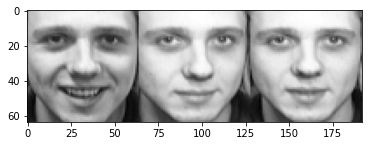

(64, 192)


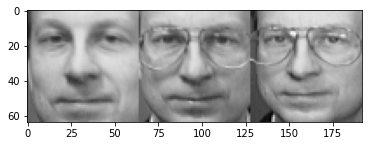

(64, 192)


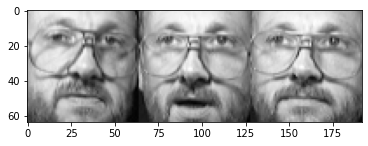

(64, 192)


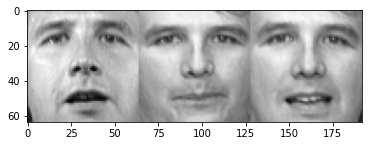

(64, 192)


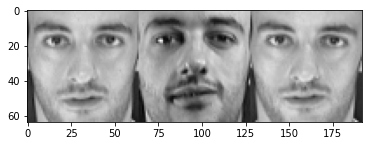

(64, 192)


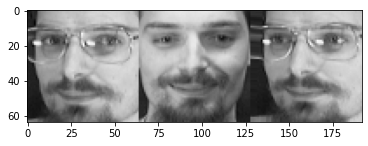

(64, 192)


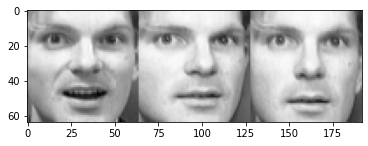

(64, 192)


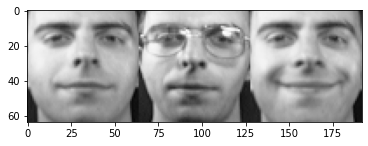

(64, 192)


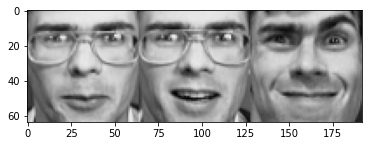

(64, 192)


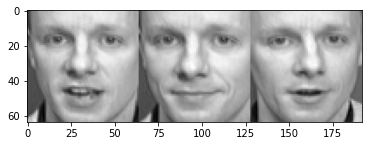

(64, 192)


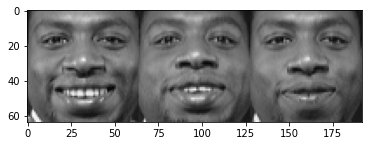

(64, 192)


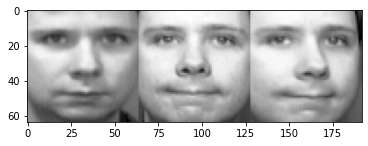

(64, 192)


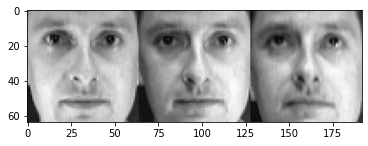

(64, 192)


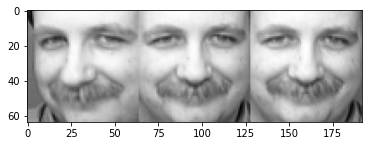

(64, 192)


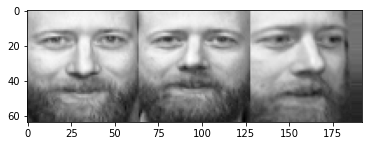

(64, 192)


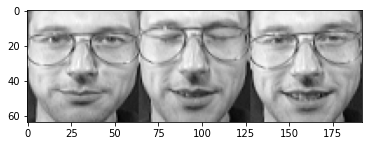

(64, 192)


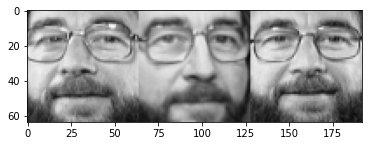

(64, 192)


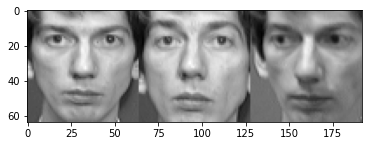

(64, 192)


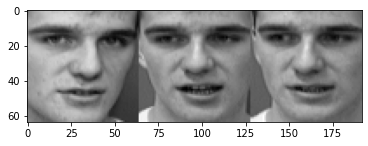

(64, 192)


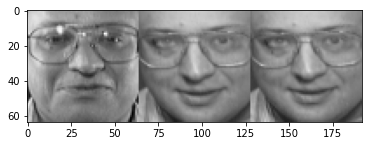

(64, 192)


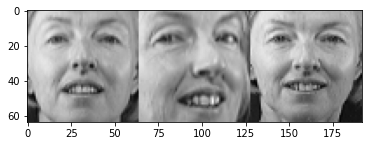

(64, 192)


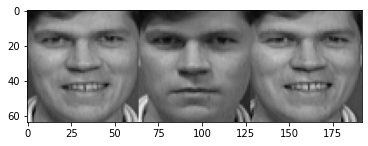

(64, 192)


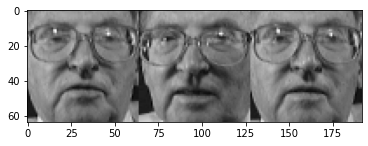

(64, 192)


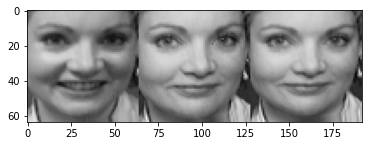

(64, 192)


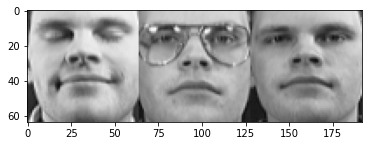

(64, 192)


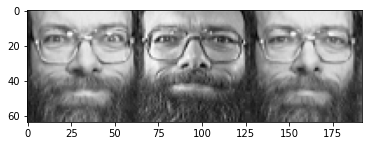

(64, 192)


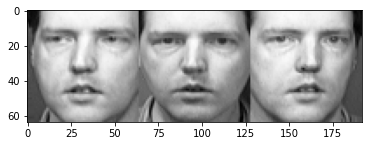

(64, 192)


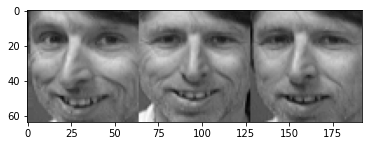

(64, 256)


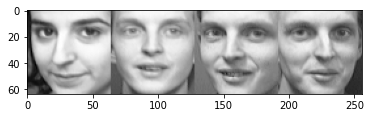

In [11]:
for c in range(k):
    target_id = (log_reg.predict(x_test) == c)
    target_img_vecs = x_test[target_id]
    plot_img(target_img_vecs)

---
## 차원축소를 적용하여 분류기 성능 높이기

In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans()),
    ("log_reg", LogisticRegression())
])

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {"kmeans__n_clusters": [10, 20, 40, 100, 500, 1000, 2000]}
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)

In [14]:
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   0.4s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   0.4s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   0.4s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   0.7s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   0.7s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   0.7s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.4s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.4s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=40; total time=   1.5s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time=   3.6s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .............................kmeans__n_clusters=100; total time=   3.9s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, 

[CV] END .............................kmeans__n_clusters=100; total time=   3.7s
[CV] END .............................kmeans__n_clusters=500; total time=   0.0s
[CV] END .............................kmeans__n_clusters=500; total time=   0.0s
[CV] END .............................kmeans__n_clusters=500; total time=   0.0s
[CV] END ............................kmeans__n_clusters=1000; total time=   0.0s
[CV] END ............................kmeans__n_clusters=1000; total time=   0.0s
[CV] END ............................kmeans__n_clusters=1000; total time=   0.0s
[CV] END ............................kmeans__n_clusters=2000; total time=   0.0s
[CV] END ............................kmeans__n_clusters=2000; total time=   0.0s
[CV] END ............................kmeans__n_clusters=2000; total time=   0.0s


c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': [10, 20, 40, 100, 500, 1000,
                                                2000]},
             verbose=2)

In [15]:
grid_clf.best_params_

{'kmeans__n_clusters': 100}

In [16]:
best_model = grid_clf.best_estimator_
best_pred = best_model.predict(x_test)

In [17]:
accuracy_score(y_test, y_test)

1.0

100% 정확도 ㄷㄷㄷ

---
## 가우시안 혼합 모델을 사용하여 올리베티 얼굴 데이터셋 학습하기


In [18]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.24780156, 0.37693435, 0.4584769 , 0.50766027, 0.5443041 ,
       0.5767057 , 0.60183156, 0.6234158 , 0.6424502 , 0.6595414 ,
       0.6754011 , 0.69018584, 0.70303625, 0.7153847 , 0.7264952 ,
       0.73627895, 0.74521476, 0.7535232 , 0.7612088 , 0.76877415,
       0.7758903 , 0.7820036 , 0.78806424, 0.7938561 , 0.7994449 ,
       0.8048692 , 0.8100127 , 0.81501687, 0.8198438 , 0.824368  ,
       0.8287715 , 0.8327626 , 0.83654463, 0.84019667, 0.84357053,
       0.84683794, 0.85004914, 0.85321206, 0.8562105 , 0.8590524 ,
       0.86186254, 0.8645698 , 0.8672352 , 0.86977845, 0.872245  ,
       0.8746599 , 0.8770609 , 0.8793273 , 0.8815434 , 0.88373935,
       0.88581556, 0.8878202 , 0.88976324, 0.89165574, 0.8935154 ,
       0.89531374, 0.8970919 , 0.8988373 , 0.90052086, 0.9021873 ,
       0.9038016 , 0.90539134, 0.9069245 , 0.9084097 , 0.9098805 ,
       0.91131794, 0.9127359 , 0.91414493, 0.9155016 , 0.91683733,
       0.9181615 , 0.9194581 , 0.9207211 , 0.9219339 , 0.92312

In [19]:
target_d = np.argmax(cumsum >= 0.99) + 1
target_d, x_train.shape, pca.explained_variance_ratio_.shape

(200, (280, 4096), (280,))

In [20]:
pca = PCA(n_components=target_d)
x_train_re = pca.fit_transform(x_train)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train_re, y_train)

c:\users\gus8c\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
accuracy_score(log_reg.predict(pca.transform(x_test)), y_test)

0.975

PCA로 차원축소한 데이터로 학습을 했는데 일단 결과는 하기 전과 똑같음.

In [23]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=k, n_init=10)

In [24]:
gm.fit(x_train_re)

GaussianMixture(n_components=40, n_init=10)

In [35]:
x_new = gm.sample(100)[0]
x_new.shape

(100, 200)

In [41]:
x_new_img = pca.inverse_transform(x_new)
x_new_img.shape

(100, 4096)

(64, 192)


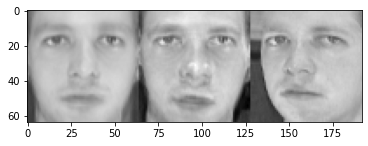

(64, 64)


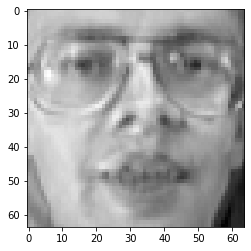

(64, 192)


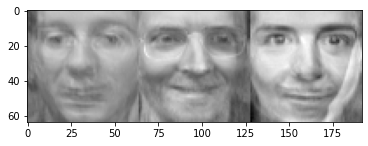

(64, 192)


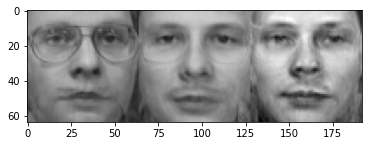

(64, 128)


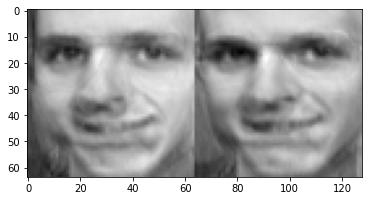

(64, 192)


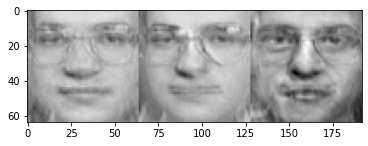

(64, 192)


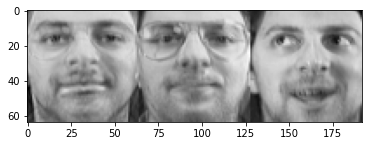

(64, 256)


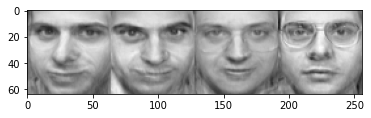

(64, 64)


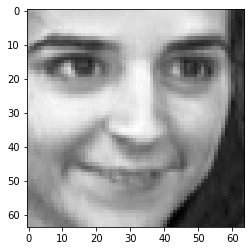

(64, 192)


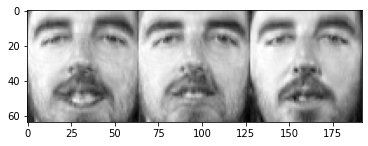

(64, 256)


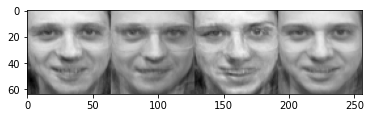

(64, 192)


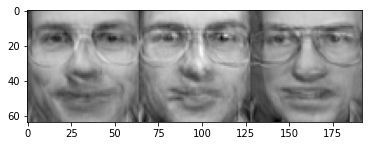

(64, 256)


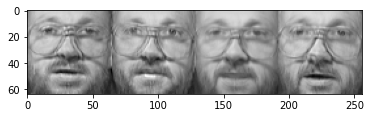

(64, 128)


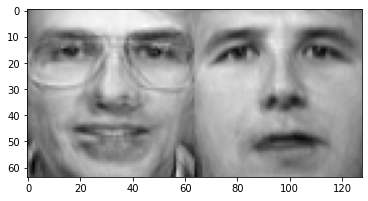

(64, 384)


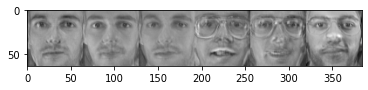

(64, 128)


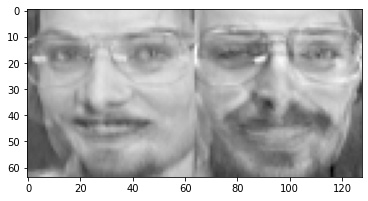

(64, 64)


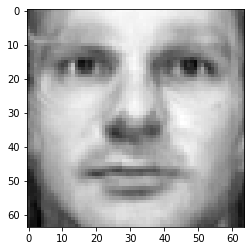

(64, 320)


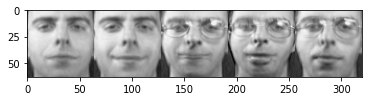

(64, 192)


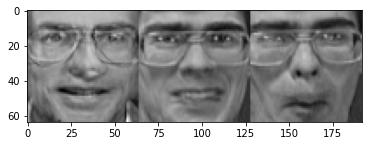

(64, 320)


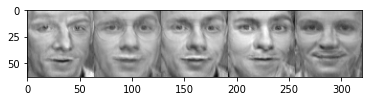

(64, 192)


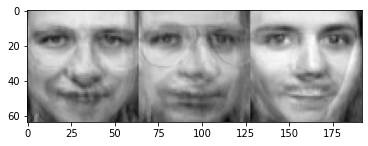

(64, 192)


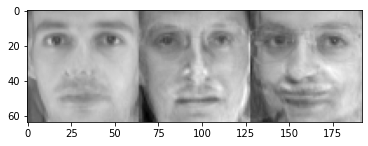

(64, 448)


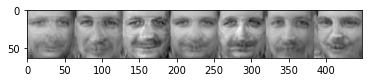

(64, 192)


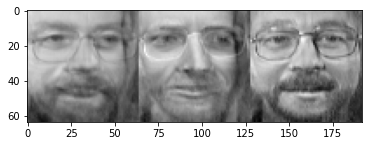

(64, 128)


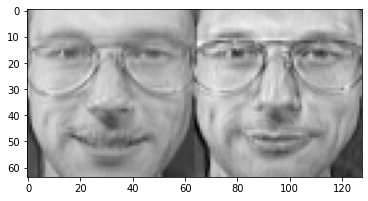

(64, 256)


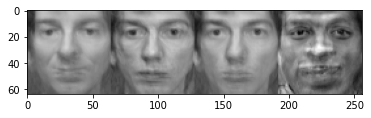

(64, 128)


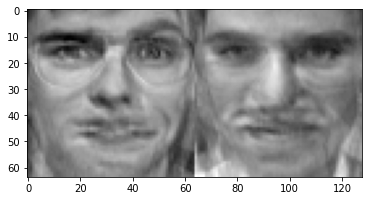

(64, 128)


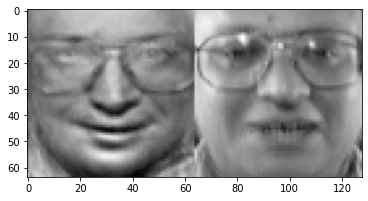

(64, 192)


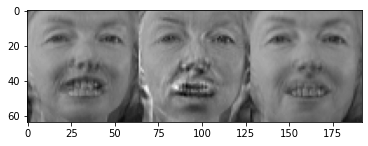

(64, 128)


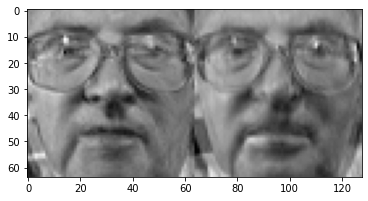

(64, 64)


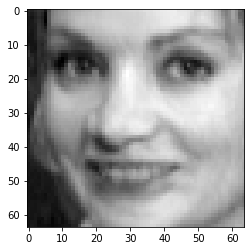

(64, 128)


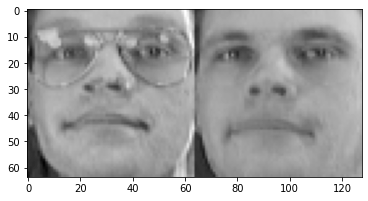

(64, 192)


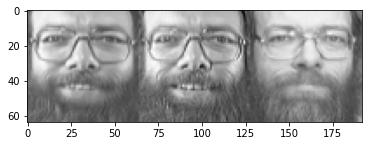

(64, 64)


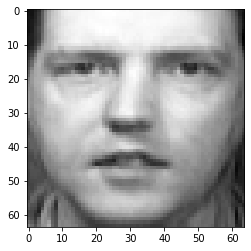

(64, 64)


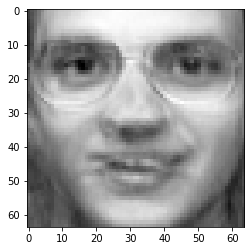

In [43]:
for c in range(k):
    target_id = (log_reg.predict(x_new) == c)
    target_img_vecs = x_new_img[target_id]
    plot_img(target_img_vecs)

PCA로 학습 데이터셋을 차원 축소한 데이터에 대해 가우시안 혼합 모델을 학습한 뒤, 샘플링한 데이터를 이미지로 출력한 모습.